## import Libs and Frameworks

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## read dataset

In [45]:
df = pd.read_csv('income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Clean data

In [46]:
df = df.replace('?',np.nan).dropna().reset_index().drop(columns=["index",'educational-num'])
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [47]:
print(df['income'].value_counts())
print('\n',df['gender'].value_counts())

<=50K    34014
>50K     11208
Name: income, dtype: int64

 Male      30527
Female    14695
Name: gender, dtype: int64


In [48]:
for col in df.columns : 
    print(f'{col}:',len(df[col].value_counts()))

age: 74
workclass: 7
fnlwgt: 26741
education: 16
marital-status: 7
occupation: 14
relationship: 6
race: 5
gender: 2
capital-gain: 121
capital-loss: 97
hours-per-week: 96
native-country: 41
income: 2


## category dataFrame ( str to num )

In [49]:
categorys = {}
for col in df.columns : 
    if type(df[col][0])==str:
        element_col = df[col].value_counts().index
        df = df.replace(element_col,np.arange(len(element_col)))
        categorys[col] = pd.Series(np.arange(len(element_col)),element_col)

In [50]:
df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,5,1,6,2,1,0,0,0,40,0,0
1,38,0,89814,0,0,9,0,0,0,0,0,50,0,0
2,28,2,336951,6,0,11,0,0,0,0,0,40,0,1
3,44,0,160323,1,0,6,0,1,0,7688,0,40,0,1
4,34,0,198693,7,1,5,1,0,0,0,0,30,0,0
5,63,1,104626,9,0,1,0,0,0,3103,0,32,0,1
6,24,0,369667,1,1,5,3,0,1,0,0,40,0,0
7,55,0,104996,8,0,0,0,0,0,0,0,10,0,0
8,65,0,184454,0,0,6,0,0,0,6418,0,40,0,1
9,36,5,212465,2,0,3,0,0,0,0,0,40,0,0


## plot histogram data

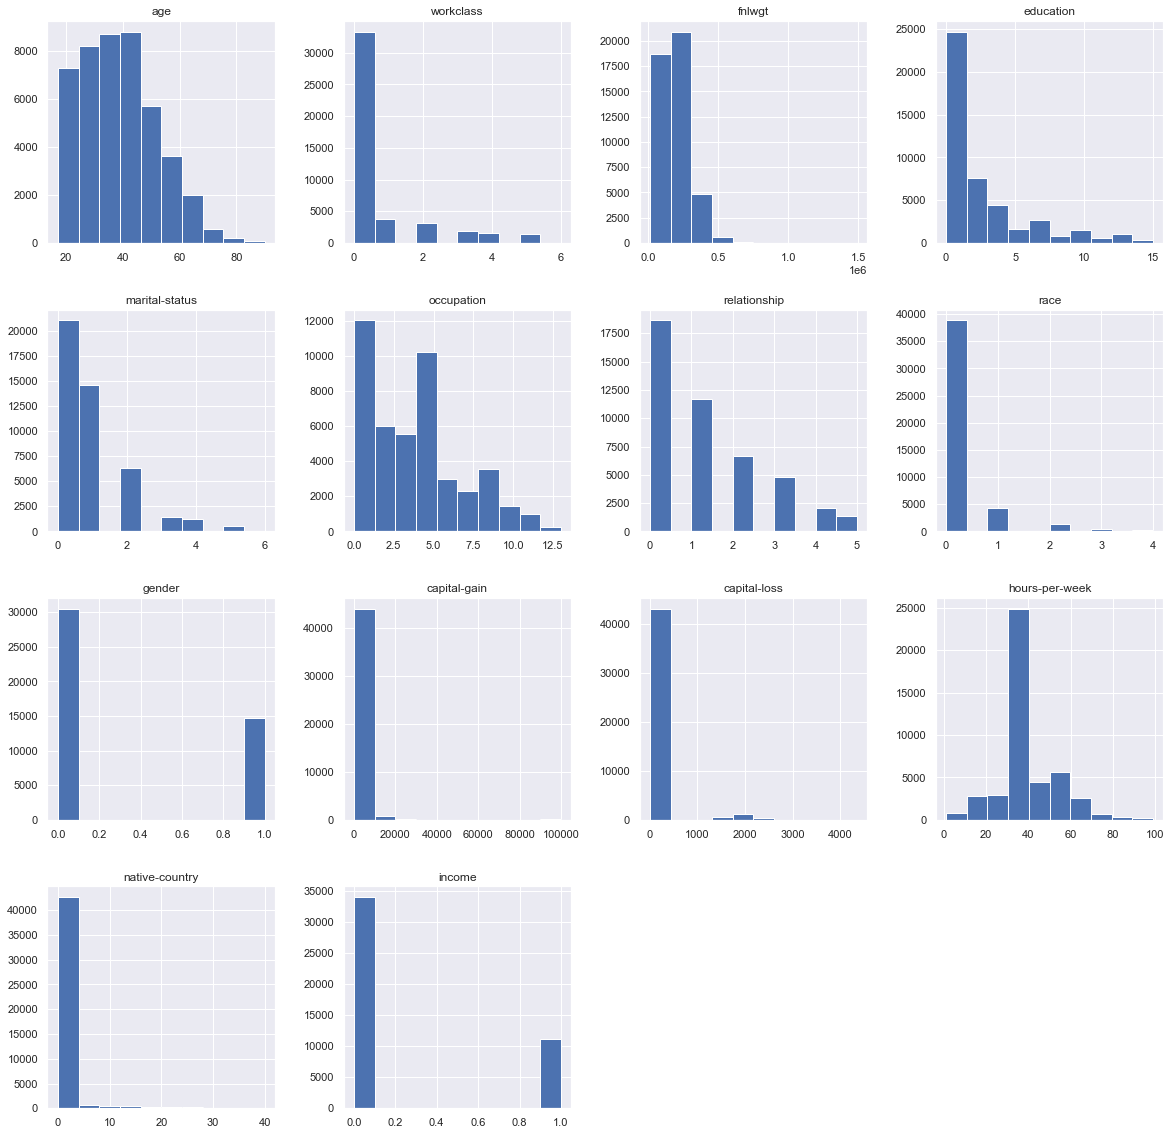

In [8]:
sns.set_theme()
ph = df.hist(figsize=(20,20))

## plot heatmap data

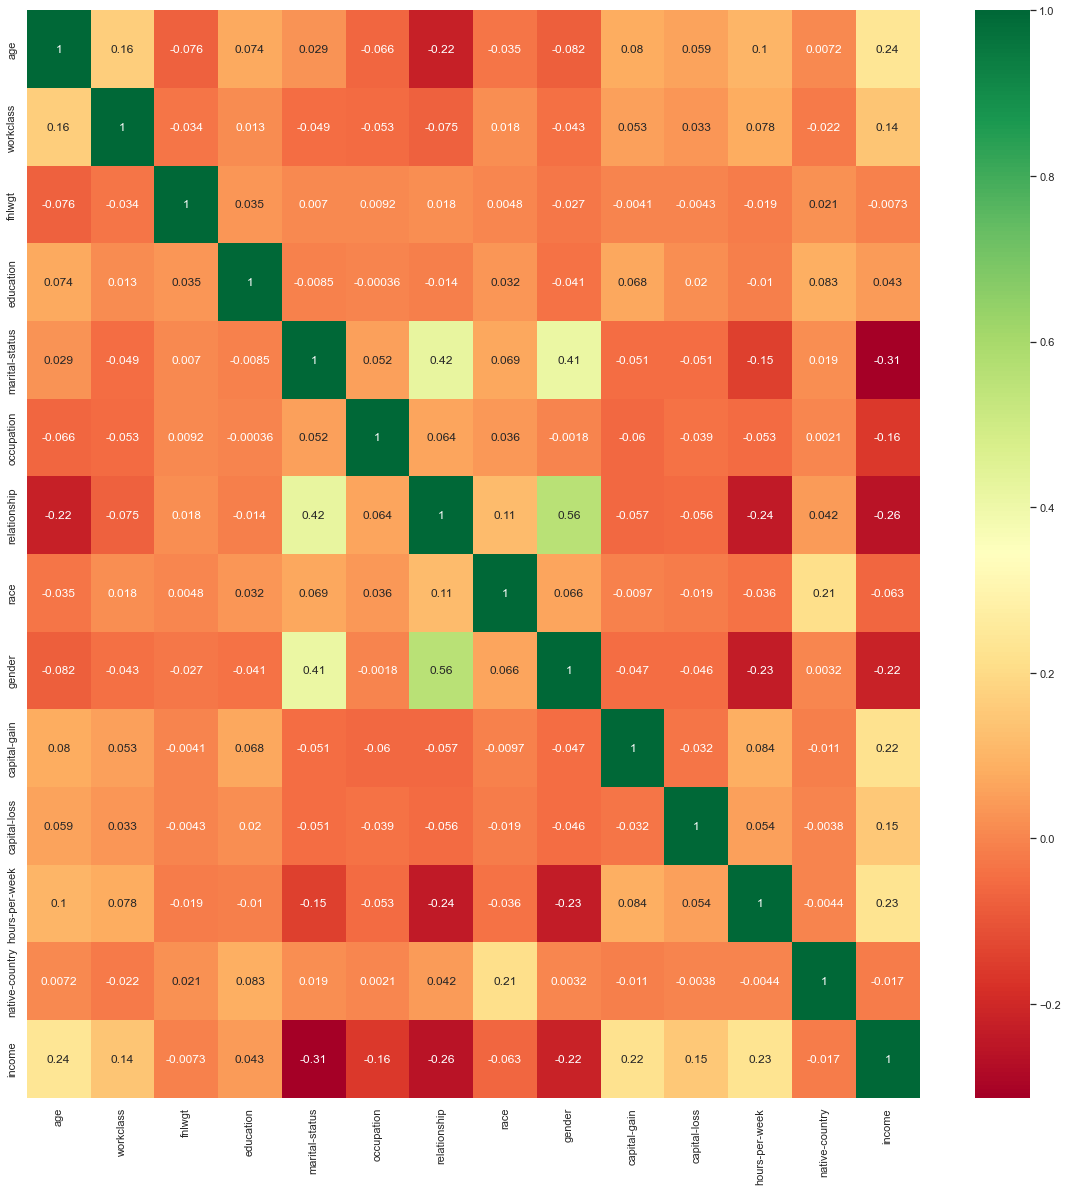

In [9]:
plt.figure(figsize=(20,20))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

## plot data

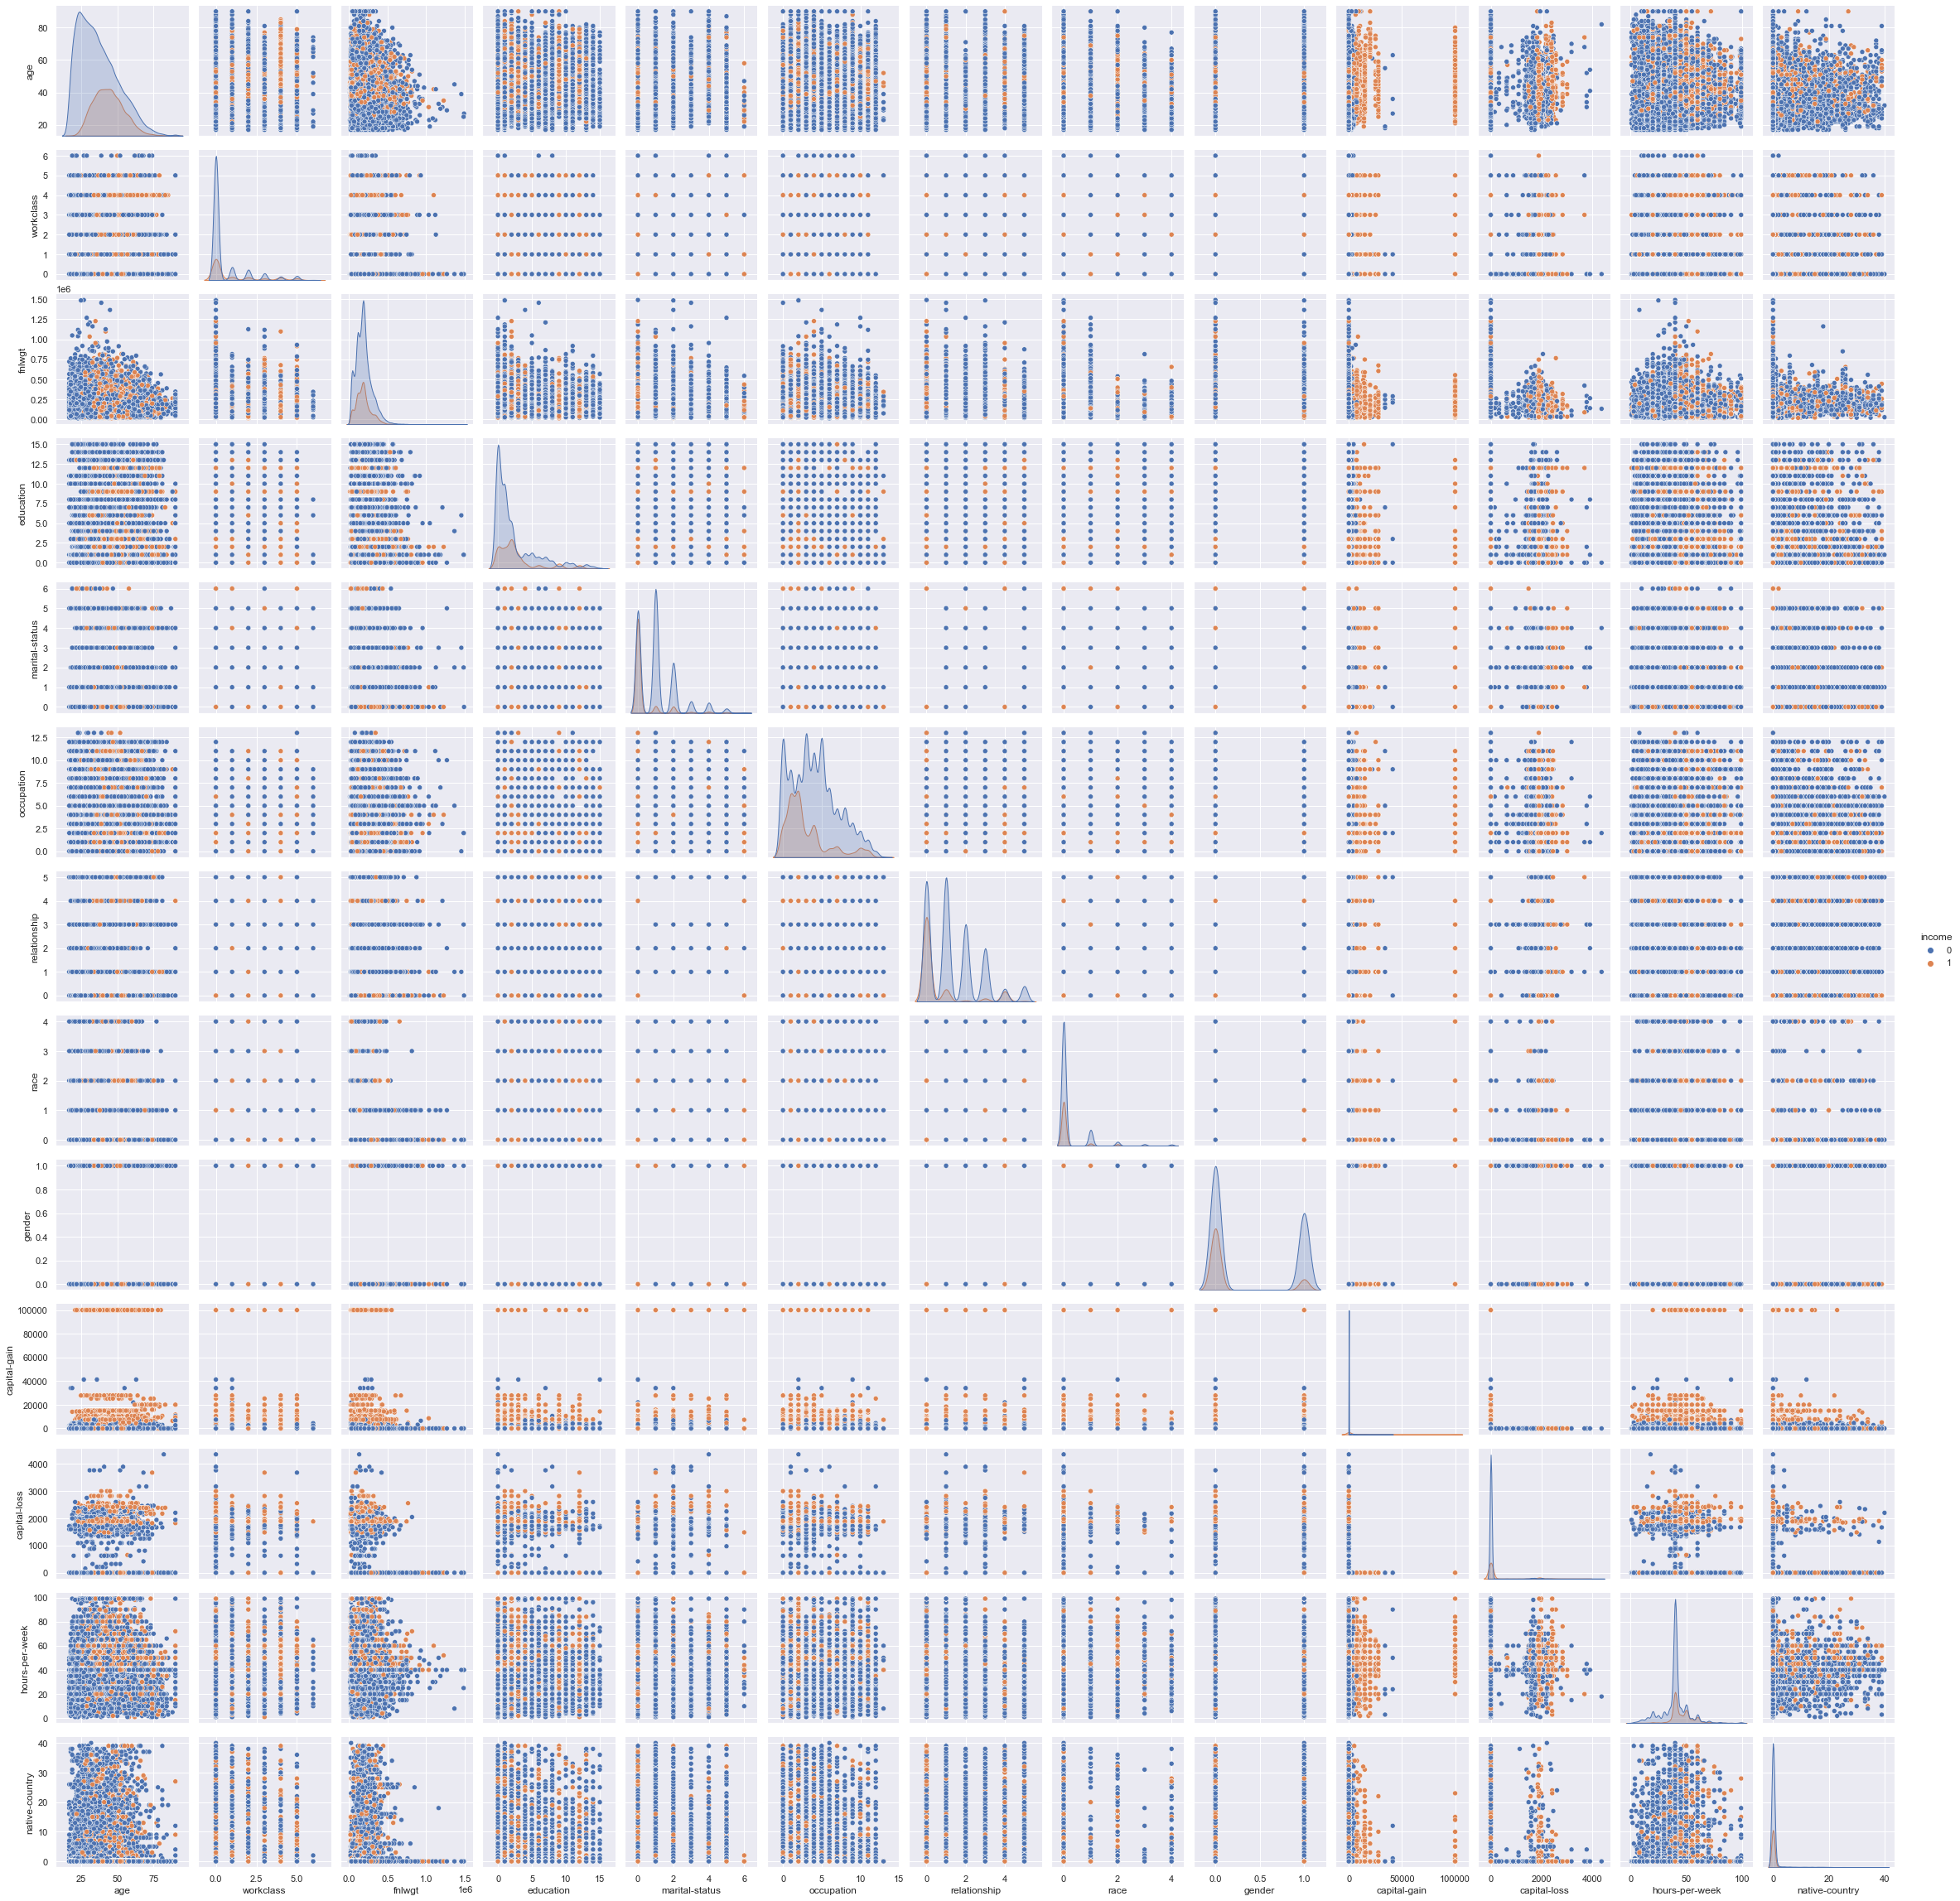

In [45]:
pp = sns.pairplot(df,hue='income')

## choose best var x 

In [78]:
#x = df.drop(columns=['income','education','fnlwgt','race','native-country','occupation']).values
x = df.drop(columns=['income','fnlwgt','native-country']).values
y = df[['income']].values

## Normalize X Data 

In [79]:
scaler = preprocessing.StandardScaler().fit(x)
x_ = scaler.transform(x.astype(float))

## Train/Test split

In [80]:
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,random_state=3)
print(f'test : x size {test_x.shape} y size {test_y.shape}')
print(f'train : x size {train_x.shape} y size {train_y.shape}')

test : x size (9045, 11) y size (9045, 1)
train : x size (36177, 11) y size (36177, 1)


# Classification
## Using KNN 

In [81]:
Ks = 16

error_rate = []
accuracy_rate = []
KNNs = []

for n in range(1,Ks):
    KNNs.append(KNeighborsClassifier(n_neighbors=n).fit(train_x,train_y.ravel()))
    test_y_hat = KNNs[n-1].predict(test_x)
    error_rate.append(np.mean(test_y_hat!=test_y))
    accuracy_rate.append(accuracy_score(test_y,test_y_hat))
    


## choose best K  

In [95]:
KNN = KNNs[np.argmax(accuracy_rate)]
print(f'k accuracy score test  data {np.argmax(accuracy_rate)+1}:',KNN.score(test_x,test_y))
test_y_hat = KNN.predict(test_x)

k accuracy score test  data 14: 0.8461028192371476


## plot error rate KNN  K in range 1 - 30

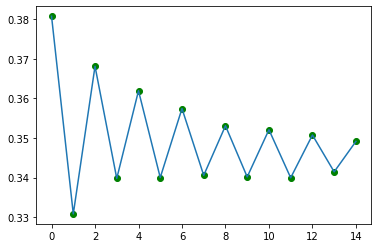

In [83]:
plt.plot(error_rate)
plt.scatter(np.arange(len(error_rate)),error_rate,color="green")
plt.show()

## plot accuracy score rate KNN  K in range 1 - 30

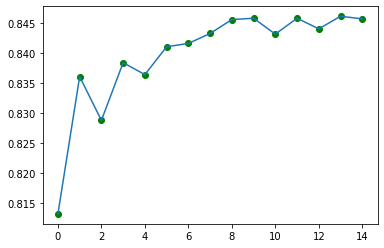

In [84]:
plt.plot(accuracy_rate)
plt.scatter(np.arange(len(accuracy_rate)),accuracy_rate,color="green")
plt.show()

## F1-Score and plot confusion matrix

In [85]:
print(classification_report(test_y, test_y_hat, target_names=['more 50k', 'less 50k']))

              precision    recall  f1-score   support

    more 50k       0.87      0.94      0.90      6800
    less 50k       0.75      0.56      0.64      2245

    accuracy                           0.85      9045
   macro avg       0.81      0.75      0.77      9045
weighted avg       0.84      0.85      0.84      9045



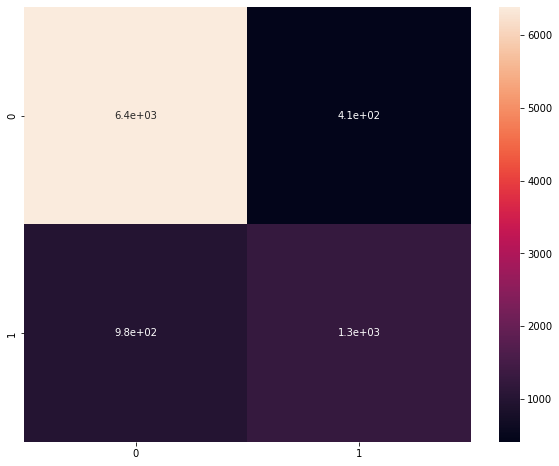

In [86]:
mat = confusion_matrix(test_y, test_y_hat)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)
plt.show()

In [94]:
KNN.predict([2,2,3,33,4,,5,4])

TypeError: 'float' object cannot be interpreted as an integer